# Explore here

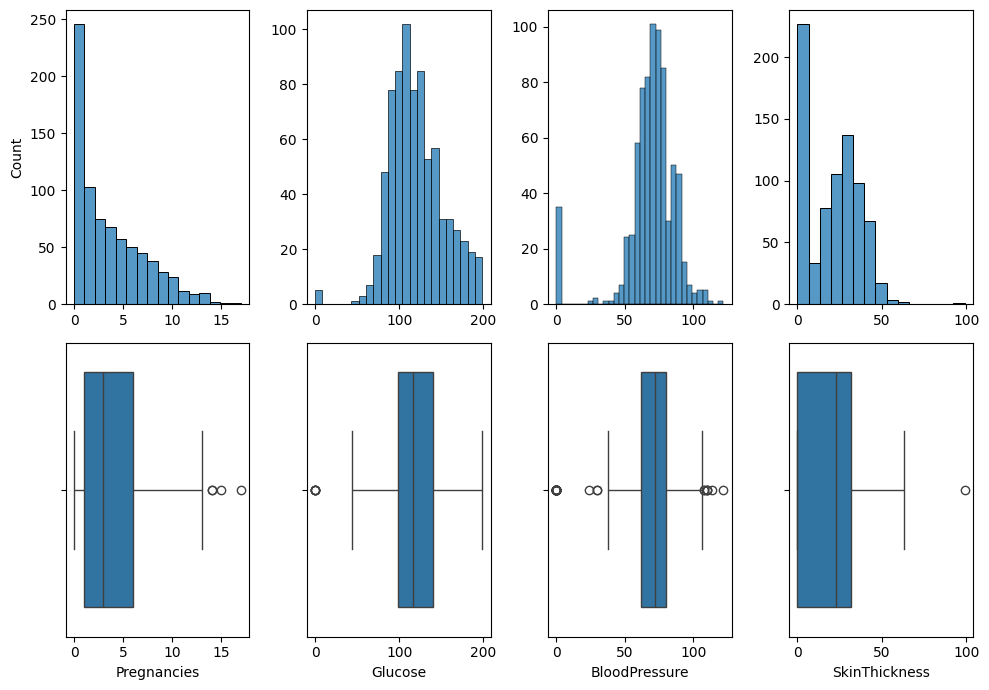

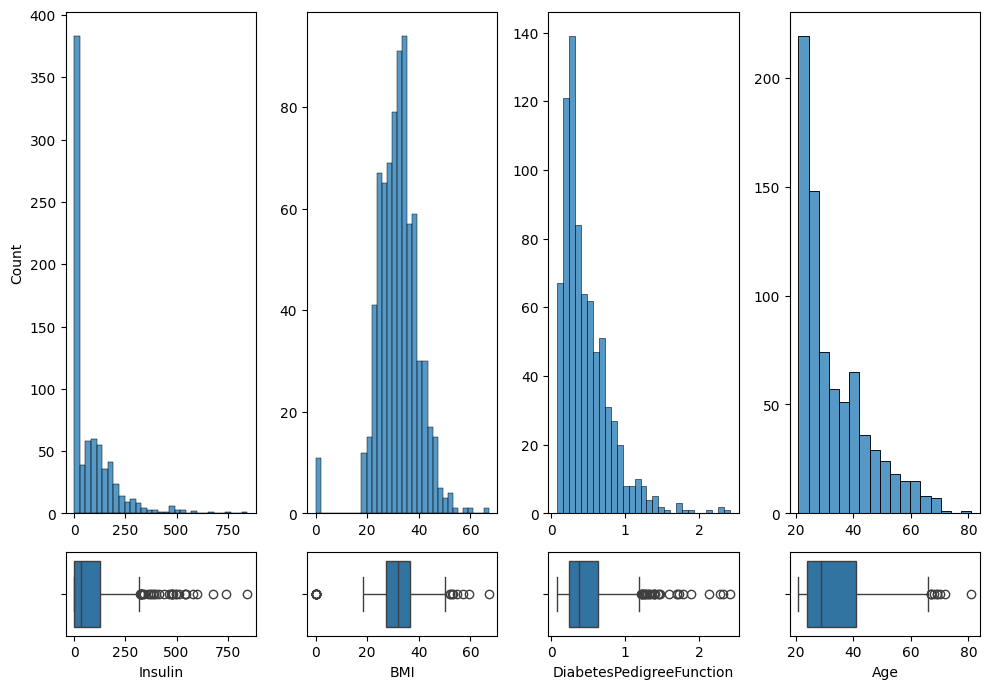

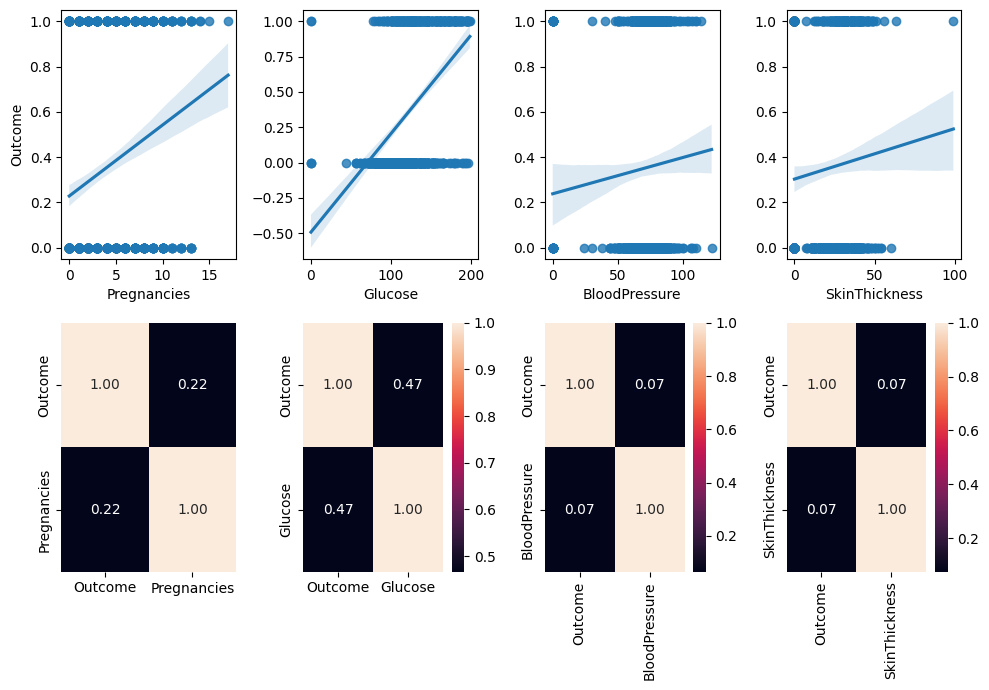

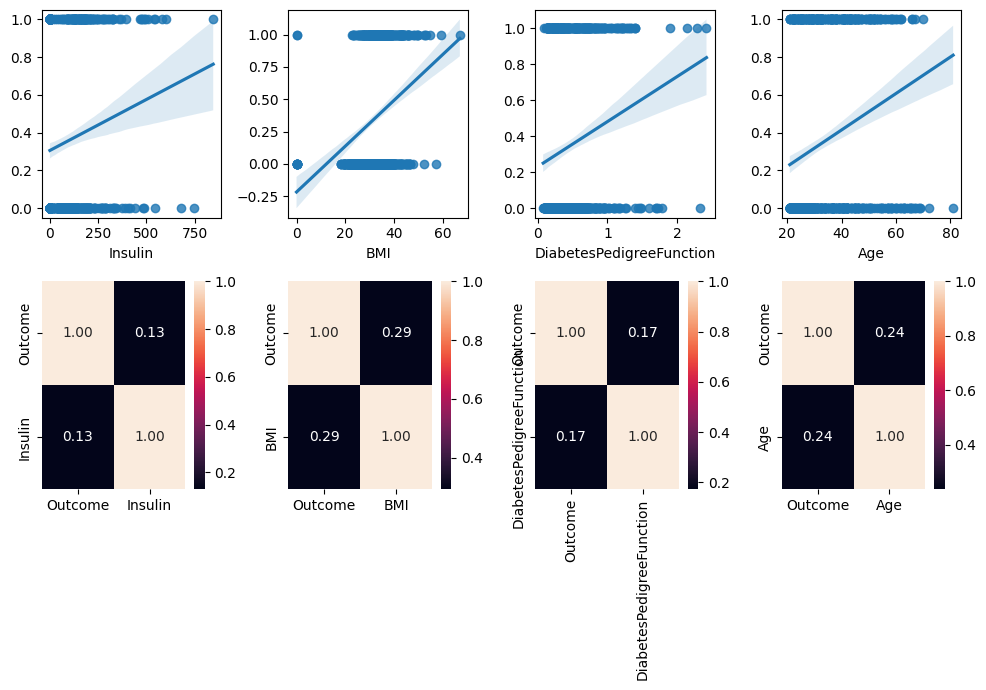

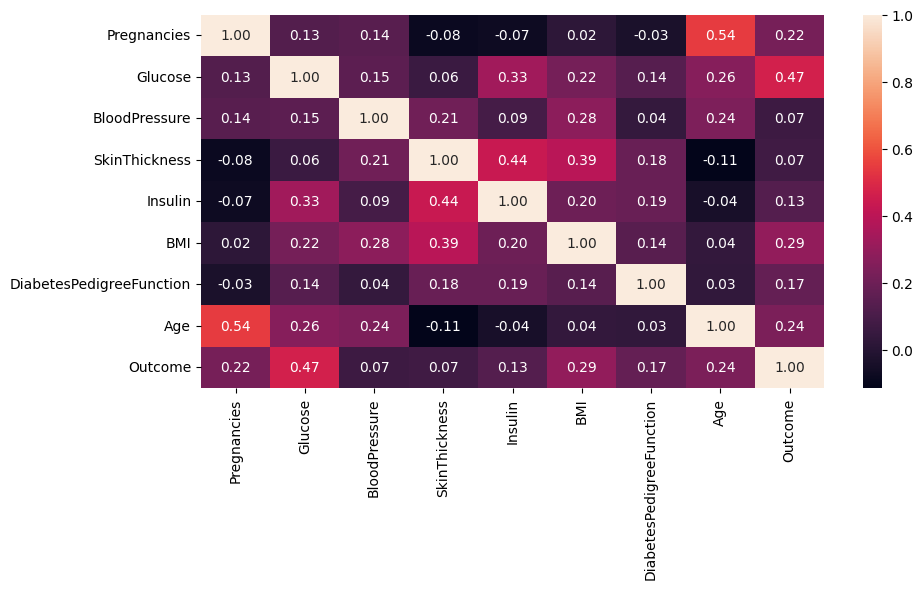

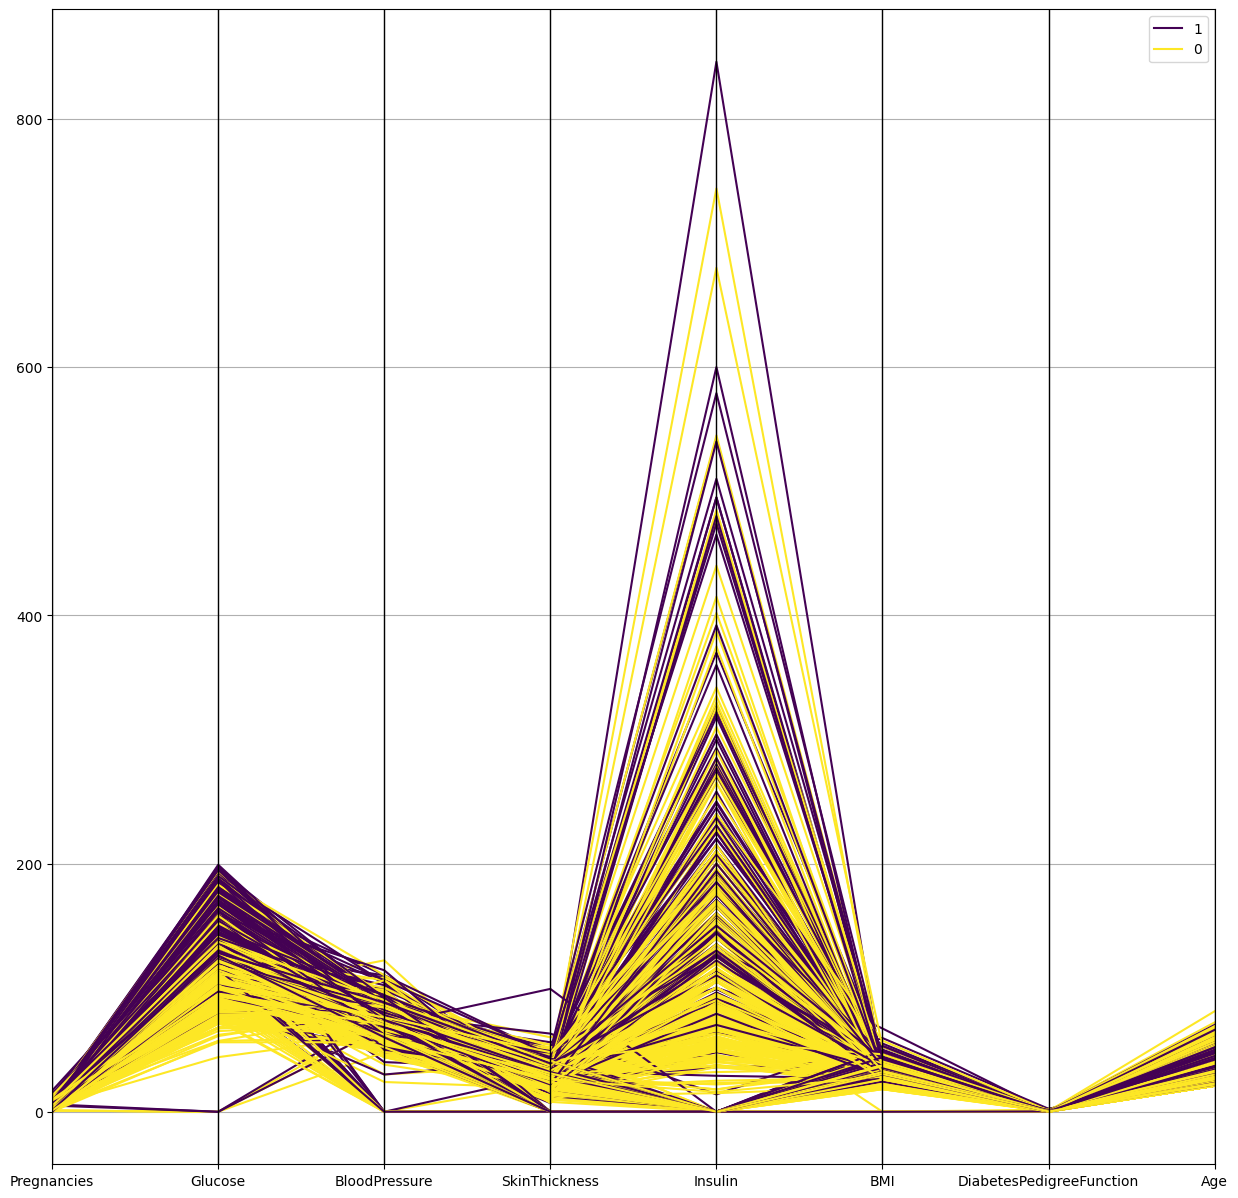

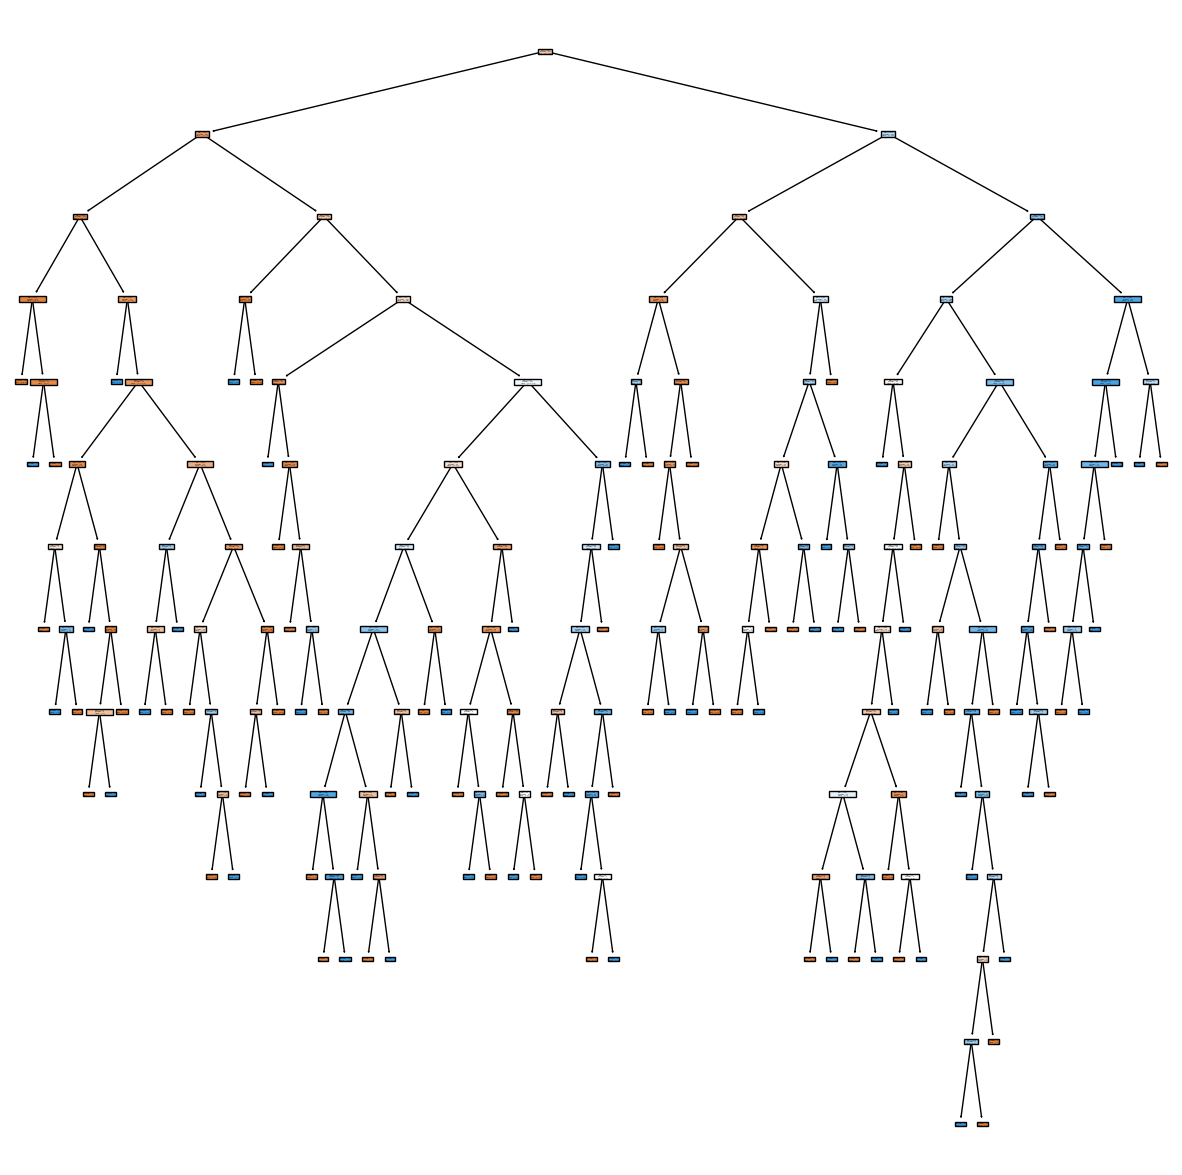

Parámetros Óptimos: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Precisión del modelo predeterminado: 0.25434585858585845
Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Precisión del modelo con mejores hiperparámetros: 0.3166774972051397


['../models/random_forest_model.joblib']

In [4]:
# Your code here

# comienzo con la importacion de los requirimientos y la creacion de DF:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.to_csv('../data/raw/raw.csv')
df.drop_duplicates()
df

# devuelvo el DF sin los nulos:

df.dropna()
df

# relaizo el analisis de variables numéricas:

import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 4, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "BloodPressure")
sns.histplot(ax = axis[0, 3], data = df, x = "SkinThickness").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "SkinThickness")


# Ajusto y muestro:

plt.tight_layout()
plt.show()

fig, axis = plt.subplots(2, 4, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "Insulin").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Insulin")
sns.histplot(ax = axis[0, 1], data = df, x = "BMI").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "BMI")
sns.histplot(ax = axis[0, 2], data = df, x = "DiabetesPedigreeFunction").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[0, 3], data = df, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "Age")

#Ajusto y muestro:

plt.tight_layout()
plt.show()


# veo qeu hay outliers por todos lados!!!!!

# Análisis numerico-numerico:

fig, axis = plt.subplots(2, 4, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df, x = "Pregnancies", y = "Outcome")
sns.heatmap(df[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "Glucose", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = df, x = "BloodPressure", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])
sns.regplot(ax = axis[0, 3], data = df, x = "SkinThickness", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3])

#Ajusto y muestro:

plt.tight_layout()
plt.show()


# vemos que los altos niveles de glucosa y la situacion de embarado son los mas indexados con la posibilidad de padecer diabetes.

fig, axis = plt.subplots(2, 4, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df, x = "Insulin", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])
sns.regplot(ax = axis[0, 1], data = df, x = "BMI", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = df, x = "DiabetesPedigreeFunction", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])
sns.regplot(ax = axis[0, 3], data = df, x = "Age", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3])

#Ajusto y muestro:

plt.tight_layout()
plt.show()


# vemos que el hecho de tener antedecentes prevalece para la consecución de padecer diabetes, el indice de masa corporal y la edad.

# Análisis de correlaciones:

fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".2f")

#Ajusto y muestro:

plt.tight_layout()
plt.show()


# veo que las variables entre si y entre otras tienen bastante correlación, por lo que decido dejarlas todas.

# realizo el escalado:

from sklearn.model_selection import train_test_split

X= df.drop(['Outcome'],axis=1)
y= df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

# Prueba para decidir de realizar el arbol según bibliografia.

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
pd.plotting.parallel_coordinates(df,'Outcome',colormap='viridis')

# Viridis es la mas recomendada para datos continuos y agradable a la vista.

# entreno al modelo de clasificación usando el arbol de decisiones del conjunto de entrenamiento:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

# visualización del árbol:

import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=list(X_train.columns),filled=True)

# Muestro:

plt.show()


# Usamos el modelo de Árbol para predecir sobre el conjunto:

y_pred = model.predict(X_test)
y_pred

# Calculo y muestro la precisión del modelo:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

# realizo búsqueda de hiperparametros más óptimos para un modelo de Árbol con el metodo GRID:

from sklearn.model_selection import GridSearchCV

hyperparametros= {
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid= GridSearchCV(model,hyperparametros,scoring='accuracy',cv=5)
grid


# Ajustamos y obtenemos parámetros óptimos:

grid.fit(X_train,y_train)
print(f'Parámetros Óptimos: {grid.best_params_}')

# creamos un nuevo modelo con esos parámtros óptimos:

modelo_optimizado = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=2,min_samples_split=2,random_state=42)
modelo_optimizado.fit(X_train,y_train)

# Predicciones sobre el modelo mejorado:

y_pred_mejorado = modelo_optimizado.predict(X_test)
accuracy_score(y_pred_mejorado,y_test)

# Guardo el modelo:

from pickle import dump
dump(modelo_optimizado,open("../models/arbol_optimizado.sav","wb"))  # escritura binaria.

#Carga del modelo:

from pickle import load
modelo_optimizado=load(open("../models/arbol_optimizado.sav",'rb'))  #lectura binaria.


# Usar el modelo:

modelo_optimizado.predict(X_test)

from sklearn.ensemble import RandomForestClassifier

# Defino el Random forest:

random_forest_model = RandomForestClassifier(random_state=42)

#Paso 2: Construye un random forest
from sklearn.ensemble import RandomForestRegressor

# Entrenamiento del modelo de Random Forest con hiperparámetros predeterminados
rf_model_default = RandomForestRegressor(random_state=42)
rf_model_default.fit(X_train, y_train)

# Evaluación del modelo predeterminado
default_accuracy = rf_model_default.score(X_test, y_test)
print("Precisión del modelo predeterminado:", default_accuracy)

# Definición de diferentes combinaciones de hiperparámetros para probar
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Búsqueda de los mejores hiperparámetros usando GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenamiento del modelo con los mejores hiperparámetros
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluación del modelo con los mejores hiperparámetros
best_accuracy = best_rf_model.score(X_test, y_test)
print("Precisión del modelo con mejores hiperparámetros:", best_accuracy)

# Paso 3: Guarda el modelo
from joblib import dump

# Guardar el modelo con los mejores hiperparámetros
dump(best_rf_model, '../models/random_forest_model.joblib')

